In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
date = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Practice\\Hotel Data analysis project\\Dataset\\dim_date.csv")
hotel = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Practice\\Hotel Data analysis project\\Dataset\\dim_hotels.csv")
room = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Practice\\Hotel Data analysis project\\Dataset\\dim_rooms.csv")
aggregate_booking = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Practice\\Hotel Data analysis project\\Dataset\\fact_aggregated_bookings.csv")
booking = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Practice\\Hotel Data analysis project\\Dataset\\fact_bookings.csv")
august_data = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Practice\\Hotel Data analysis project\\Dataset\\new_data_august.csv")

In [3]:
date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [4]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [5]:
date['date'] = pd.to_datetime(date.date, format = '%d-%b-%y')

In [6]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [7]:
date.rename(columns = {'mmm yy' : 'month_year', 'week no' : 'week_no'}, inplace = True)

In [8]:
date.head()

,date,month_year,week_no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [9]:
hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [10]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [11]:
room.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [12]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [13]:
aggregate_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [14]:
aggregate_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [15]:
aggregate_booking['check_in_date'] = pd.to_datetime(aggregate_booking.check_in_date, format = '%d-%b-%y')

In [16]:
aggregate_booking.capacity.fillna(aggregate_booking.capacity.mean(), inplace = True)

In [17]:
aggregate_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 359.5+ KB


In [18]:
booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [19]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [20]:
booking['booking_date'] = pd.to_datetime(booking.booking_date)

In [21]:
booking['check_in_date'] = pd.to_datetime(booking.check_in_date)

In [22]:
booking['checkout_date'] = pd.to_datetime(booking.checkout_date)

In [23]:
booking['no_guests'] = abs(booking.no_guests)

In [24]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134587 non-null  float64       
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(3), object(4)
memory usage: 12.3+ MB


### Find out unique property ids in aggregate bookings dataset


In [25]:
aggregate_booking.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

###  Find out total bookings per property_id

In [26]:
booking.groupby('property_id')['property_id'].count()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: property_id, dtype: int64

###  Find out days on which bookings are greater than capacity

In [27]:
aggregate_booking.check_in_date[aggregate_booking.successful_bookings > aggregate_booking.capacity]

3      2022-05-01
12     2022-05-01
4136   2022-06-11
6209   2022-07-02
8522   2022-07-25
9194   2022-07-31
Name: check_in_date, dtype: datetime64[ns]

###  Find out properties that have highest capacity


In [28]:
aggregate_booking[aggregate_booking.capacity == aggregate_booking.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,2022-05-01,RT2,38,50.0
128,17558,2022-05-02,RT2,27,50.0
229,17558,2022-05-03,RT2,26,50.0
328,17558,2022-05-04,RT2,27,50.0
428,17558,2022-05-05,RT2,29,50.0
...,...,...,...,...,...
8728,17558,2022-07-27,RT2,22,50.0
8828,17558,2022-07-28,RT2,21,50.0
8928,17558,2022-07-29,RT2,23,50.0
9028,17558,2022-07-30,RT2,32,50.0


### What is the average occupancy rate in each of the room categories?

In [29]:
aggregate_booking.loc[aggregate_booking.successful_bookings > aggregate_booking.capacity, 
                      'successful_bookings'] = aggregate_booking.capacity

In [30]:
aggregate_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,19,19.0
4,16558,2022-05-01,RT1,18,19.0


In [31]:
aggregate_booking['occupancy_rate'] = (aggregate_booking.successful_bookings/aggregate_booking.capacity) * 100

In [32]:
aggregate_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,2022-05-01,RT1,25,30.0,83.333333
1,19562,2022-05-01,RT1,28,30.0,93.333333
2,19563,2022-05-01,RT1,23,30.0,76.666667
3,17558,2022-05-01,RT1,19,19.0,100.000000
4,16558,2022-05-01,RT1,18,19.0,94.736842


In [33]:
aggregate_booking.groupby('room_category')['occupancy_rate'].mean()

room_category
RT1    57.962187
RT2    58.027971
RT3    58.028291
RT4    59.295330
Name: occupancy_rate, dtype: float64

### I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage


In [34]:
room_agg_booking = aggregate_booking.merge(room, how = 'left', left_on = 'room_category', right_on = 'room_id')

In [35]:
room_agg_booking.groupby('room_class')['occupancy_rate'].mean()

room_class
Elite           58.027971
Premium         58.028291
Presidential    59.295330
Standard        57.962187
Name: occupancy_rate, dtype: float64

### What is the average occupancy rate per city

In [36]:
hotel_agg_booking = aggregate_booking.merge(hotel, how = 'left', left_on = 'property_id', 
                                            right_on = 'property_id')

In [37]:
hotel_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,83.333333,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30.0,93.333333,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30.0,76.666667,Atliq Palace,Business,Bangalore
3,17558,2022-05-01,RT1,19,19.0,100.000000,Atliq Grands,Luxury,Mumbai
4,16558,2022-05-01,RT1,18,19.0,94.736842,Atliq Grands,Luxury,Delhi


In [38]:
hotel_agg_booking.groupby('city')['occupancy_rate'].mean()

city
Bangalore    56.391563
Delhi        61.528057
Hyderabad    58.139432
Mumbai       57.923108
Name: occupancy_rate, dtype: float64

### When was the occupancy better? Weekday or Weekend?


In [39]:
date_agg_booking = aggregate_booking.merge(date, how = 'left', left_on = 'check_in_date', right_on = 'date')

In [40]:
date_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,date,month_year,week_no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.333333,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.333333,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.666667,2022-05-01,May 22,W 19,weekend
3,17558,2022-05-01,RT1,19,19.0,100.000000,2022-05-01,May 22,W 19,weekend
4,16558,2022-05-01,RT1,18,19.0,94.736842,2022-05-01,May 22,W 19,weekend


In [41]:
date_agg_booking.groupby('day_type')['occupancy_rate'].mean()

day_type
weekeday    51.815256
weekend     74.008343
Name: occupancy_rate, dtype: float64

#### Occupancy is better on Weekends. 

### What is the revenue realized per hotel type

In [42]:
hotel_booking = booking.merge(hotel, how = 'left', left_on = 'property_id', right_on = 'property_id')

In [43]:
hotel_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-01-05,2022-02-05,3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-01-05,2022-04-05,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-01-05,2022-02-05,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-01-05,2022-02-05,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [44]:
hotel_booking.groupby('category')['revenue_realized'].sum()

category
Business     656019297
Luxury      1052751932
Name: revenue_realized, dtype: int64

###  What is the average rating per city


In [45]:
hotel_booking.groupby('city')['ratings_given'].mean()

city
Bangalore    3.407681
Delhi        3.779015
Hyderabad    3.661132
Mumbai       3.650455
Name: ratings_given, dtype: float64

### Create a pie chart of revenue realized per booking platform

In [46]:
revenue_per_booking_platform = booking.groupby('booking_platform')['revenue_realized'].sum()

In [47]:
revenue_per_booking_platform

booking_platform
direct offline     86404333
direct online     169026467
journey           102531334
logtrip           187554488
makeyourtrip      340834504
others            699353302
tripster          123066801
Name: revenue_realized, dtype: int64

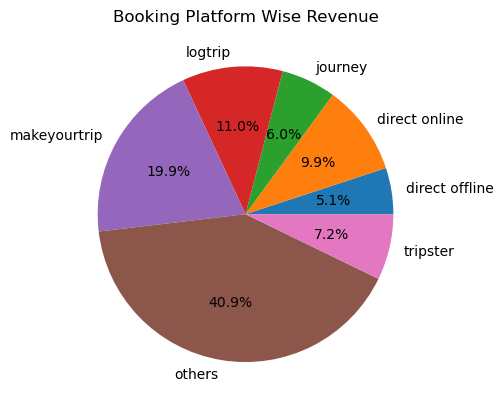

In [48]:
revenue_per_booking_platform.plot(kind = 'pie', title = 'Booking Platform Wise Revenue', ylabel = '', autopct = '%1.1f%%')

plt.show()